# Ejercicio 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:

# Carga las imagenes y las convierte a escala de grises
imagen1_gris = cv2.imread('./img1_tp.png', cv2.IMREAD_GRAYSCALE)
imagen2_gris = cv2.imread('./img2_tp.png', cv2.IMREAD_GRAYSCALE)

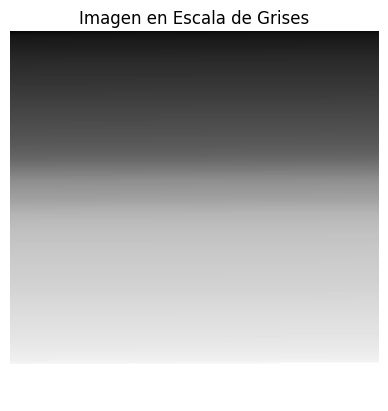

In [5]:
#mostrar las imagen 1
plt.imshow(imagen1_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

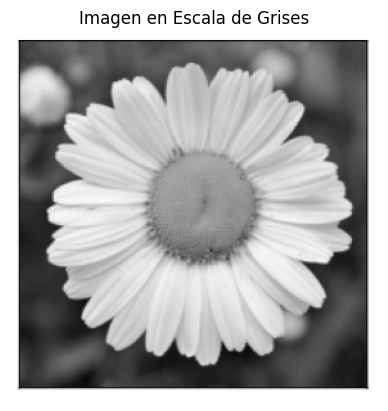

In [4]:
#mostrar las imagen 2
plt.imshow(imagen2_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

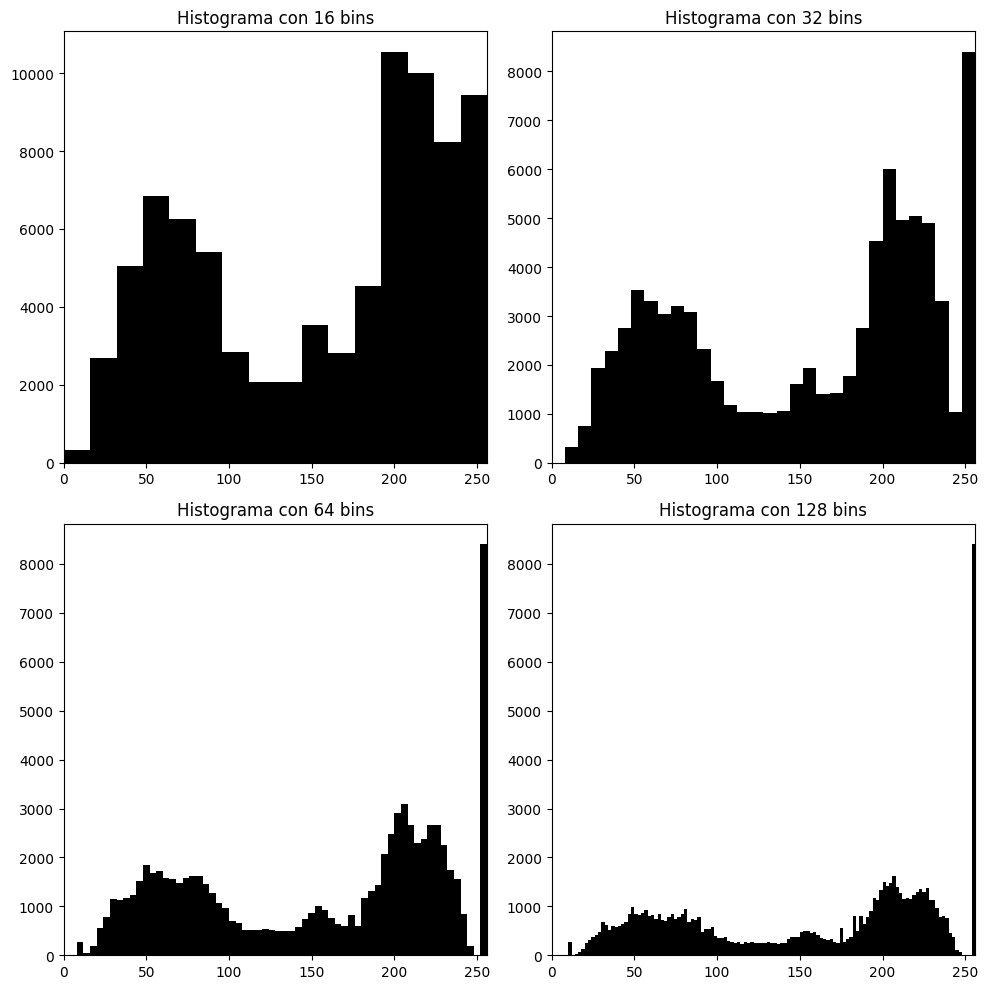

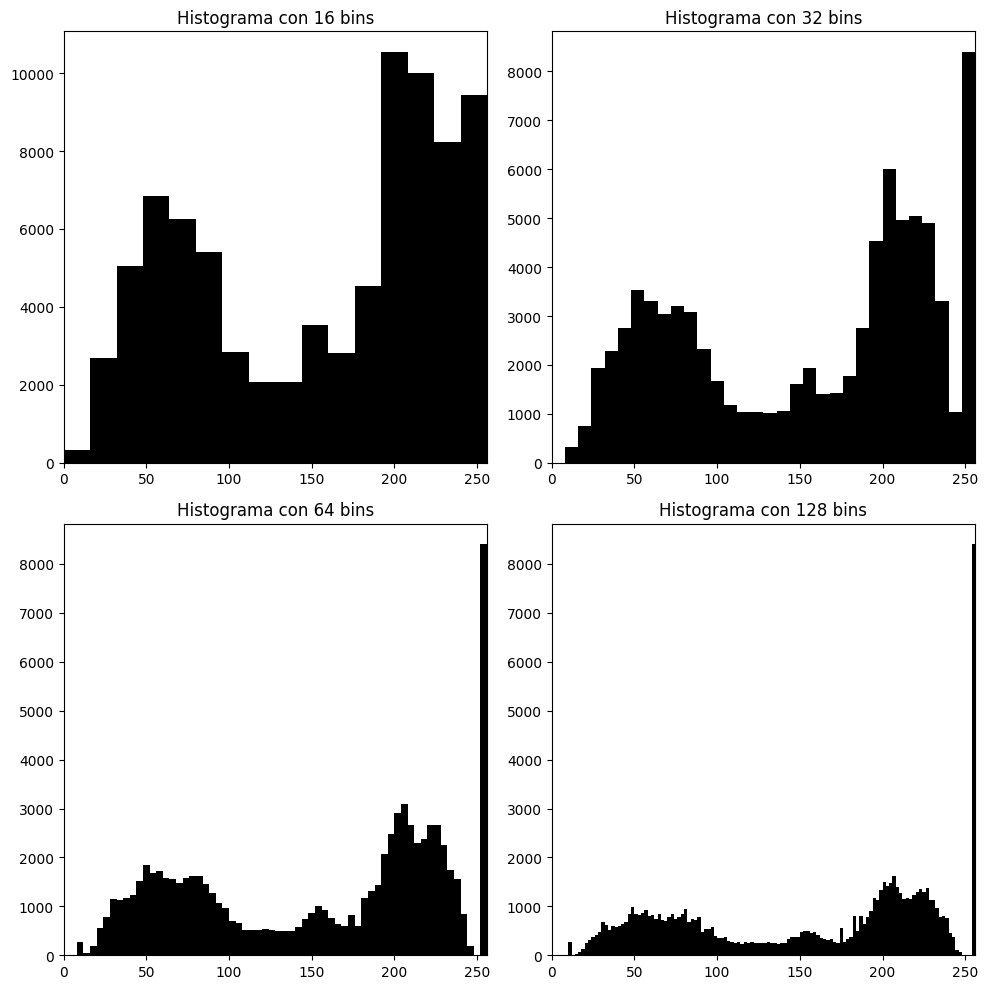

In [6]:
#Histogramas    

rutas =['./img1_tp.png', './img2_tp.png']

for ruta in rutas:
    # Lee la imagen en escala de grises
    imagen_gris = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    # Define diferentes numeros de bins
    bins_list = [16, 32, 64, 128]

    # Crea un panel 2x2 para las figuras
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Aplana la lista de ejes para un facil acceso
    axes = axes.ravel()

    # Calcula y plotea el histograma para cada numero de bins
    for i, bins in enumerate(bins_list):
        axes[i].hist(imagen_gris.ravel(), bins=bins, range=[0, 256], color='black')
        axes[i].set_title(f'Histograma con {bins} bins')
        axes[i].set_xlim([0, 256])

    # Ajusta el layout para que no haya superposicion
    plt.tight_layout()

    # Muestra la figura
    plt.show()

*Observaciones*: 
* Se observan que ambas imágenes tienen mismo histograma, por lo que se puede deducir que tienen la misma distribucion de intensidades. 
* Tabajar con 32 bins resulta una buena opción para mantener continuidad y suavidad en el dominio.
* U histograma en escala de grises cuenta el número de píxeles que tienen un valor específico de intensidad (de 0 a 255) en la imagen, pero no captura la distribución espacial de esos valores. Es decir, dos imágenes con contenidos visualmente muy diferentes pueden tener distribuciones de intensidad similares, lo que resulta en histogramas idénticos. Viendo que los histogramas pierden información espacial y de contexto, no serían adecuados como única característica para entrenar un modelo de clasificación o detección de imágenes, aunque pueden ser útiles como una parte de un conjunto más amplio de features.


3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

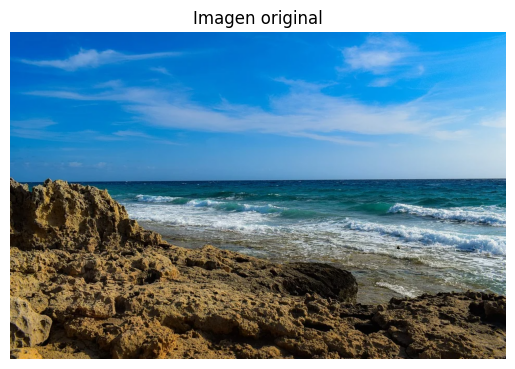

In [7]:
# Leemos la imagen y la convertimos a RGB
imagen= cv2.imread('./segmentacion.png')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Visualiza la imagen usando Matplotlib
plt.imshow(imagen_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.show()

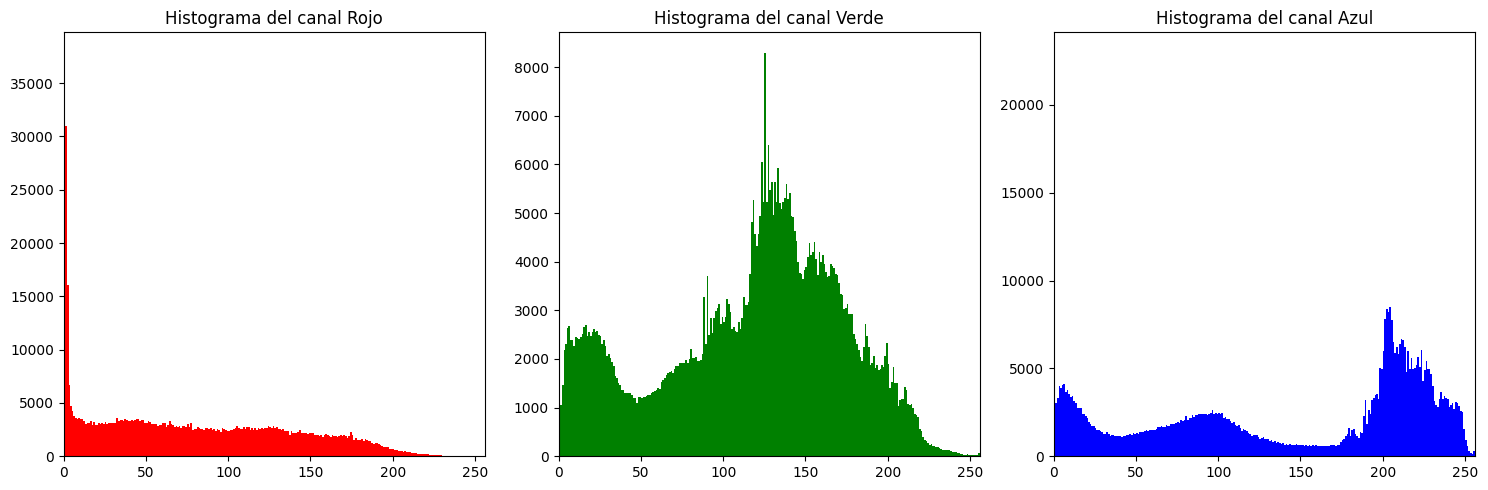

In [8]:
# Separa los canales de color
R, G, B = cv2.split(imagen_rgb)

# Crea un panel de 1x3 para mostrar los histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Colores para cada canal
colors = ['red', 'green', 'blue']
channels = [R, G, B]
titles = ['Histograma del canal Rojo', 'Histograma del canal Verde', 'Histograma del canal Azul']

# Genera y muestra los histogramas
for i, (channel, color, title) in enumerate(zip(channels, colors, titles)):
    axes[i].hist(channel.ravel(), bins=256, range=[0, 256], color=color)
    axes[i].set_title(title)
    axes[i].set_xlim([0, 256])

# Ajusta el layout para evitar superposiciones
plt.tight_layout()

# Muestra el grafico
plt.show()

### Histograma  canal rojo:


La concentración de valores bajos corresponde principalmente a las áreas del cielo y el mar, que tienen poco componente rojo.
Los valores medios y altos, aunque menos frecuentes, representan la arena y las rocas de la playa, que tienen tonos cálidos.


### Histograma  canal verde:


La distribución más compleja refleja la variedad de elementos en la escena.
Los picos en los valores medios-altos corresponden al color del mar y el cielo.
Los valores más bajos probablemente representan las sombras en las rocas y la arena.
La presencia de valores en todo el rango indica la diversidad de tonos verdes en el agua y la arena.


### Histograma canal azul:


El pico prominente en los valores altos corresponde al cielo azul claro y las áreas más claras del mar.
El pico secundario en los valores más bajos representa probablemente las rocas y la arena, que tienen menos componente azul.
La distribución amplia refleja la variación de tonos azules en el cielo y el mar.

### Análisis:

Los histogramas reflejan correctamente una escena de playa con cielo despejado y mar.
La dominancia de azul y verde en los histogramas coincide con los colores predominantes del cielo y el mar.
La presencia de valores más altos en el canal rojo, aunque menos frecuentes, representa adecuadamente los tonos cálidos de la arena y las rocas.
La complejidad del histograma verde captura bien la variedad de tonos en el agua, desde turquesa hasta verde oscuro.
La distribución bimodal del azul refleja el contraste entre las áreas claras (cielo, mar) y las más oscuras (rocas, arena).

In [9]:
img_HSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
c1, c2, c3 = cv2.split(img_HSV)

# Tierra

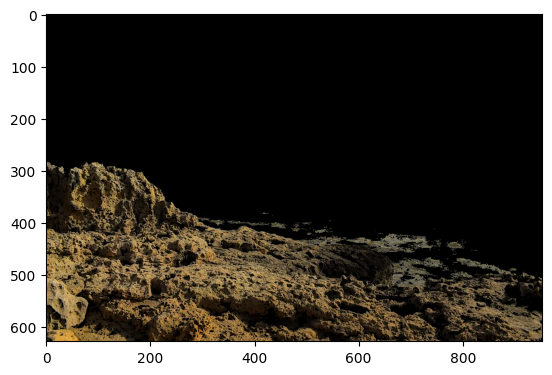

In [10]:
color_l = (10,40,0)
color_u = (30,250,255)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

plt.figure(12)
plt.imshow(img_segmentada)
plt.show()

# Cielo

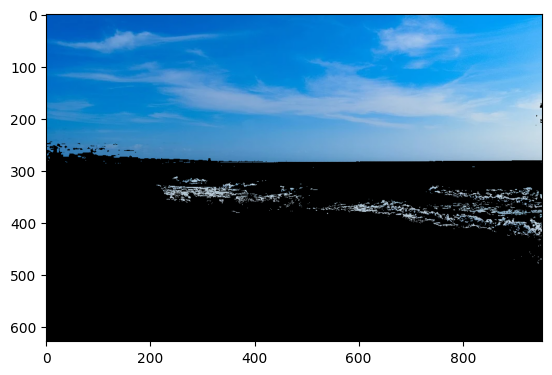

In [11]:
color_l = (100,30,180)
color_u = (110,255,255)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

plt.figure(15)
plt.imshow(img_segmentada)
plt.show()

# Agua

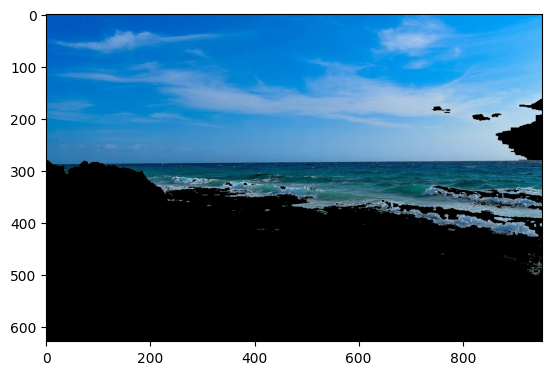

In [12]:
color_l = (80, 50, 50)

color_u = (110, 255, 255)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mask)

plt.figure(18)
plt.imshow(img_segmentada)
plt.show()

No se está logra separar adecuadamente el agua del cielo. Esto puede ocurrir por varias razones:

* Similitud de colores: El cielo y el agua a menudo tienen tonos de azul muy similares, lo que dificulta la separación basada únicamente en el color.
* Variación de iluminación: La luz del sol y los reflejos pueden causar que partes del agua tengan tonos similares al cielo.
* Gradientes de color: Tanto el cielo como el agua suelen presentar gradientes suaves, lo que complica establecer límites claros.
Rangos de color demasiado amplios o estrechos: Los rangos definidos en el código pueden no ser óptimos para tu imagen específica.

# Ajuste a segmentación

In [13]:


def segment_beach_image(image_path, resize_factor=0.6):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("No se pudo cargar la imagen.")
    
    # Reducir el tamaño de la imagen para mejorar el rendimiento
    if resize_factor > 0:
        height, width = image.shape[:2]
        new_size = (int(width * resize_factor), int(height * resize_factor))
        image = cv2.resize(image, new_size)
    
    height, width = image.shape[:2]

    # Convertir a HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Máscara para arena (basada en color)
    lower_sand = np.array([20, 50, 50])
    upper_sand = np.array([40, 255, 255])
    mask_sand = cv2.inRange(hsv, lower_sand, upper_sand)

    # Máscara para agua y cielo (basada en color)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # Crear una máscara basada en la posición vertical
    gradient = np.linspace(0, 1, height)[:, np.newaxis]
    position_mask = np.tile(gradient, (1, width))

    # Umbral para separar cielo y agua basado en posición
    threshold = 0.455  # Ajusta este valor según sea necesario
    mask_sky = (position_mask < threshold).astype(np.uint8) * 255
    mask_water = (position_mask >= threshold).astype(np.uint8) * 255

    # Combinar máscaras de color y posición
    mask_sky = cv2.bitwise_and(mask_blue, mask_sky)
    mask_water = cv2.bitwise_and(mask_blue, mask_water)

    # Refinar máscaras
    kernel = np.ones((3, 3), np.uint8)  # Usar un kernel más pequeño
    mask_sand = cv2.morphologyEx(mask_sand, cv2.MORPH_CLOSE, kernel)
    mask_sky = cv2.morphologyEx(mask_sky, cv2.MORPH_CLOSE, kernel)
    mask_water = cv2.morphologyEx(mask_water, cv2.MORPH_CLOSE, kernel)

    # Aplicar máscaras
    result_sand = cv2.bitwise_and(image, image, mask=mask_sand)
    result_sky = cv2.bitwise_and(image, image, mask=mask_sky)
    result_water = cv2.bitwise_and(image, image, mask=mask_water)

    return result_sand, result_sky, result_water

# Uso del código
image_path = './segmentacion.png'
sand, sky, water = segment_beach_image(image_path)

# Mostrar resultados
cv2.imshow('Arena', sand)
cv2.imshow('Cielo', sky)
cv2.imshow('Agua', water)
cv2.waitKey(0)
cv2.destroyAllWindows()
